<a href="https://colab.research.google.com/github/joaosocorro/CAP-TULO-16-Aprendizagem-por-Refor-o/blob/main/CAP%C3%8DTULO_15_Codificadores_autom%C3%A1ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [22]:
import pandas as pd
import numpy as np

In [23]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Algumas funções utilitárias para plotar imagens 28x28 em tons de cinza:

In [24]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

Construir conjunto de dados 3D:

In [25]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

Agora vamos construir o Autoencoder...

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [27]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 10ms/step - loss: 0.2795
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1235
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0618
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0497
Epoch 5/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0570
Epoch 6/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0487
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 8/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0500
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0411
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0137
Epoch 11/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 12/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 13/20
2/2 [==============================] - 0s 6ms/step - loss: 0

In [28]:
codings = encoder.predict(X_train)

2/2 [==============================] - 0s 4ms/step


Saving figure linear_autoencoder_pca_plot


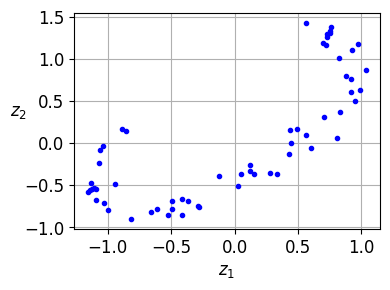

In [29]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=12)
plt.ylabel("$z_2$", fontsize=12, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()

**Representações de dados eficientes**

**Executando PCA com um Linear Subcompleto Codificador automático**

In [30]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [31]:
#tf.keras

In [32]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

ModuleNotFoundError: No module named 'tensorflow.contrib'

In [33]:
n_inputs = 3 # 3D inputs
n_hidden = 2 # 2D codings
n_outputs = n_inputs

In [34]:
learning_rate = 0.01

In [35]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = fully_connected(X, n_hidden, activation_fn=None)
outputs = fully_connected(hidden, n_outputs, activation_fn=None)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [36]:
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE

NameError: name 'outputs' is not defined

In [37]:
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'AdamOptimizer'

In [38]:
init = tf.global_variables_initializer()

AttributeError: module 'tensorflow' has no attribute 'global_variables_initializer'

Agora vamos carregar o conjunto de dados, treinar o modelo no conjunto de treinamento e usá-lo para codificar o conjunto de teste (ou seja, projetá-lo em 2D):

In [39]:
X_train, X_test = [...] # load the dataset

ValueError: not enough values to unpack (expected 2, got 1)

In [40]:
n_iterations = 1000
codings = hidden # the output of the hidden layer provides the codings

NameError: name 'hidden' is not defined

In [41]:
with tf.Session() as sess:
  init.run()
  for iteration in range(n_iterations):
    training_op.run(feed_dict={X: X_train}) # no labels (unsupervised)
    codings_val = codings.eval(feed_dict={X: X_test})

AttributeError: module 'tensorflow' has no attribute 'Session'

**Codificadores automáticos empilhados**

Vamos usar o MNIST:

In [42]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


**Implementação do TensorFlow**

Você pode implementar um autoencoder empilhado muito parecido com um MLP profundo regular. Em particular, as mesmas técnicas que usamos no Capítulo 11 para o treinamento de redes profundas podem ser aplicadas. Por exemplo, o código a seguir cria um autoencoder empilhado para o MNIST, usando a inicialização da inicialização, a função de ativação da elu e a regularização de ℓ2. O código deve parecer muito familiar, exceto que não há rótulos (sem y):

In [43]:
n_inputs = 28 * 28 # for MNIST
n_hidden1 = 300
n_hidden2 = 150 # codings
n_hidden3 = n_hidden1
n_outputs = n_inputs

In [44]:
learning_rate = 0.01
l2_reg = 0.001

In [45]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [46]:
pip install conda install tensorflow

ERROR: Could not find a version that satisfies the requirement conda (from versions: 3.0.6, 3.5.0, 3.7.0, 3.17.0, 4.0.0, 4.0.1, 4.0.2, 4.0.3, 4.0.4, 4.0.5, 4.0.7, 4.0.8, 4.0.9, 4.1.2, 4.1.6, 4.2.6, 4.2.7, 4.3.13, 4.3.16)
ERROR: No matching distribution found for conda


In [47]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
with tf.contrib.framework.arg_scope(
    [fully_connected],
    activation_fn=tf.nn.elu,
    weights_initializer=tf.contrib.layers.variance_scaling_initializer(),
    weights_regularizer=tf.contrib.layers.l2_regularizer(l2_reg)):
    hidden1 = fully_connected(X, n_hidden1)
    hidden2 = fully_connected(hidden1, n_hidden2) # codings
    hidden3 = fully_connected(hidden2, n_hidden3)
    outputs = fully_connected(hidden3, n_outputs, activation_fn=None)

AttributeError: module 'tensorflow.compat.v1' has no attribute 'contrib'

In [48]:
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE

NameError: name 'outputs' is not defined

In [49]:
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

NameError: name 'reconstruction_loss' is not defined

In [50]:
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

NameError: name 'loss' is not defined

Você pode treinar o modelo normalmente. Observe que os rótulos dos dígitos  (y_batch) não são utilizados:

In [51]:
n_epochs = 5
batch_size = 150

In [52]:
with tf.Session() as sess:
init.run()
for epoch in range(n_epochs):
n_batches = mnist.train.num_examples // batch_size
for iteration in range(n_batches):
X_batch, y_batch = mnist.train.next_batch(batch_size)
sess.run(training_op, feed_dict={X: X_batch})

IndentationError: expected an indented block after 'with' statement on line 1 (<ipython-input-52-265af2b77dd8>, line 2)

In [53]:
with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    n_batches = mnist.train.num_examples // batch_size
    for iteration in range(n_batches):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run(training_op, feed_dict={X: X_batch})

NameError: name 'init' is not defined

**Pesos de amarração**

In [54]:
activation = tf.nn.elu
regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
initializer = tf.contrib.layers.variance_scaling_initializer()

AttributeError: module 'tensorflow.compat.v1' has no attribute 'contrib'

In [55]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])

In [56]:
weights1_init = initializer([n_inputs, n_hidden1])
weights2_init = initializer([n_hidden1, n_hidden2])

NameError: name 'initializer' is not defined

In [57]:
activation = tf.nn.elu
regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
initializer = tf.contrib.layers.variance_scaling_initializer()


AttributeError: module 'tensorflow.compat.v1' has no attribute 'contrib'

In [58]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])


In [59]:
weights1_init = initializer([n_inputs, n_hidden1])
weights2_init = initializer([n_hidden1, n_hidden2])


NameError: name 'initializer' is not defined

In [60]:
weights1 = tf.Variable(weights1_init, dtype=tf.float32, name="weights1")
weights2 = tf.Variable(weights2_init, dtype=tf.float32, name="weights2")
weights3 = tf.transpose(weights2, name="weights3") # tied weights
weights4 = tf.transpose(weights1, name="weights4") # tied weights


NameError: name 'weights1_init' is not defined

In [61]:
biases1 = tf.Variable(tf.zeros(n_hidden1), name="biases1")
biases2 = tf.Variable(tf.zeros(n_hidden2), name="biases2")
biases3 = tf.Variable(tf.zeros(n_hidden3), name="biases3")
biases4 = tf.Variable(tf.zeros(n_outputs), name="biases4")


In [62]:
hidden1 = activation(tf.matmul(X, weights1) + biases1)
hidden2 = activation(tf.matmul(hidden1, weights2) + biases2)
hidden3 = activation(tf.matmul(hidden2, weights3) + biases3)
outputs = tf.matmul(hidden3, weights4) + biases4


NameError: name 'weights1' is not defined

In [63]:
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))
reg_loss = regularizer(weights1) + regularizer(weights2)
loss = reconstruction_loss + reg_loss


NameError: name 'outputs' is not defined

In [64]:
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)


NameError: name 'loss' is not defined

In [65]:
init = tf.global_variables_initializer()

Pesos de amarração (GitHub)

É comum amarrar os pesos do codificador e do decodificador, simplesmente usando a transposição dos pesos do codificador como pesos do decodificador. Para isso, precisamos usar uma camada personalizada.

In [66]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [67]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

AttributeError: module 'tensorflow._api.v2.compat.v1.random' has no attribute 'set_seed'

In [68]:
show_reconstructions(tied_ae)
plt.show()

NameError: name 'show_reconstructions' is not defined

**Treine todas as camadas de uma vez** (GitHub)

Vamos construir um autoencoder empilhado com 3 camadas ocultas e 1 camada de saída (ou seja, 2 autoencoders empilhados).

In [69]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [70]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

AttributeError: module 'tensorflow._api.v2.compat.v1.random' has no attribute 'set_seed'

Esta função processa algumas imagens de teste através do AutoEncoder e exibe as imagens originais e suas reconstruções:

In [71]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

In [72]:
show_reconstructions(stacked_ae)
save_fig("reconstruction_plot")

NameError: name 'stacked_ae' is not defined

**Treinando um autoencoder de cada vez**

Em vez de treinar todo o autoencoder empilhado de uma só vez como acabamos, é muitas vezes muito mais rápido treinar um autoencoder superficial de cada vez e empilhar todos eles em um único autoencoder empilhado (daí o nome), como mostra a Figura 15 -4. Isso é especialmente útil para autoencoders muito profundos.

O código do tensorflow se parece com o seguinte:

In [73]:
[...] # Build the whole stacked autoencoder normally.
# In this example, the weights are not tied.

[Ellipsis]

In [74]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [75]:
with tf.name_scope("phase1"):
  phase1_outputs = tf.matmul(hidden1, weights4) + biases4
  phase1_reconstruction_loss = tf.reduce_mean(tf.square(phase1_outputs - X))
  phase1_reg_loss = regularizer(weights1) + regularizer(weights4)
  phase1_loss = phase1_reconstruction_loss + phase1_reg_loss
  phase1_training_op = optimizer.minimize(phase1_loss)

NameError: name 'hidden1' is not defined

In [76]:
with tf.name_scope("phase2"):
  phase2_reconstruction_loss = tf.reduce_mean(tf.square(hidden3 - hidden1))
  phase2_reg_loss = regularizer(weights2) + regularizer(weights3)
  phase2_loss = phase2_reconstruction_loss + phase2_reg_loss
  train_vars = [weights2, biases2, weights3, biases3]
  phase2_training_op = optimizer.minimize(phase2_loss, var_list=train_vars)

NameError: name 'hidden3' is not defined

Treine autoconder de uma vez (GitHb)

In [77]:
def train_autoencoder(n_neurons, X_train, X_valid, loss, optimizer,
                      n_epochs=10, output_activation=None, metrics=None):
    n_inputs = X_train.shape[-1]
    encoder = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", input_shape=[n_inputs])
    ])
    decoder = keras.models.Sequential([
        keras.layers.Dense(n_inputs, activation=output_activation),
    ])
    autoencoder = keras.models.Sequential([encoder, decoder])
    autoencoder.compile(optimizer, loss, metrics=metrics)
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)

In [78]:
tf.random.set_seed(42)
np.random.seed(42)

K = keras.backend
X_train_flat = K.batch_flatten(X_train) # equivalent to .reshape(-1, 28 * 28)
X_valid_flat = K.batch_flatten(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat, "binary_crossentropy",
    keras.optimizers.SGD(learning_rate=1.5), output_activation="sigmoid",
    metrics=[rounded_accuracy])
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, "mse", keras.optimizers.SGD(learning_rate=0.05),
    output_activation="selu")

AttributeError: module 'tensorflow._api.v2.compat.v1.random' has no attribute 'set_seed'

In [79]:
stacked_ae_1_by_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])

NameError: name 'enc1' is not defined

In [80]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

NameError: name 'stacked_ae_1_by_1' is not defined

**Visualizando as reconstruções**

Uma maneira de garantir que um autoencoder seja treinado adequadamente é comparar as entradas e as saídas. Eles devem ser bastante semelhantes, e as diferenças devem ser detalhes sem importância. Vamos traçar dois dígitos aleatórios e suas reconstruções:

In [81]:
n_test_digits = 2
X_test = mnist.test.images[:n_test_digits]

NameError: name 'mnist' is not defined

In [83]:
with tf.Session() as sess:
   [...] # Train the Autoencoder
   outputs_val = outputs.eval(feed_dict={X: X_test})

NameError: name 'outputs' is not defined

In [84]:
def plot_image(image, shape=[28, 28]):
  plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
  plt.axis("off")

NameError: name 'outputs_val' is not defined

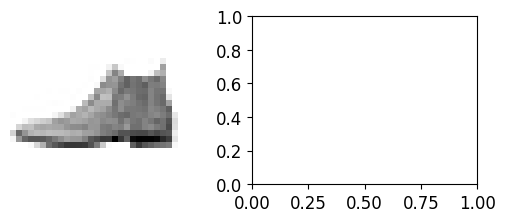

In [85]:
for digit_index in range(n_test_digits):
  plt.subplot(n_test_digits, 2, digit_index * 2 + 1)
  plot_image(X_test[digit_index])
  plt.subplot(n_test_digits, 2, digit_index * 2 + 2)
  plot_image(outputs_val[digit_index])

**Visualizando recursos**

In [87]:
with tf.Session() as sess:
   [...] # train autoencoder
   weights1_val = weights1.eval()

NameError: name 'weights1' is not defined

In [88]:
weights1_val = weights1.eval()

NameError: name 'weights1' is not defined

NameError: name 'weights1_val' is not defined

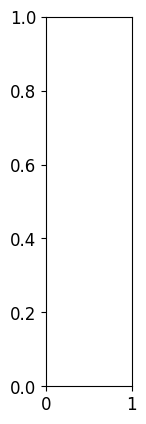

In [89]:
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plot_image(weights1_val.T[i])

**Pré -treinamento não supervisionado usando autoencoders empilhados**

**Denoising AutoEncoders**(Remoção de ruído de codificadores automáticos)

**Implementação do TensorFlow**

In [90]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
X_noisy = X + tf.random_normal(tf.shape(X))
[...]
hidden1 = activation(tf.matmul(X_noisy, weights1) + biases1)
[...]
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE
[...]

NameError: name 'weights1' is not defined

Implementar a versão dropout, que é mais comum, não é muito mais difícil:

In [92]:
!pip or !apt

ERROR: unknown command "or"


In [91]:
from tensorflow.contrib.layers import dropout

ModuleNotFoundError: No module named 'tensorflow.contrib'

In [93]:
keep_prob = 0.7

In [94]:
is_training = tf.placeholder_with_default(False, shape=(), name='is_training')
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
X_drop = dropout(X, keep_prob, is_training=is_training)
[...]
hidden1 = activation(tf.matmul(X_drop, weights1) + biases1)
[...]
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE
[...]

NameError: name 'dropout' is not defined

Durante o treinamento devemos definir is_training como True (conforme explicado no Capítulo 11) usando o feed_dict:

In [95]:
sess.run(training_op, feed_dict={X: X_batch, is_training: True})

NameError: name 'training_op' is not defined

**Autoencoders esparsos**

**Implementação do TensorFlow**

Agora temos tudo o que precisamos para implementar um autoencoder esparso usando TensorFlow:

In [96]:
def kl_divergence(p, q):
  return p * tf.log(p / q) + (1 - p) * tf.log((1 - p) / (1 - q))

In [97]:
learning_rate = 0.01
sparsity_target = 0.1
sparsity_weight = 0.2

In [98]:
[...] # Build a normal autoencoder (in this example the coding layer is hidden1)

[Ellipsis]

In [99]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [101]:
hidden1_mean = tf.reduce_mean(hidden1, axis=0) # batch mean
sparsity_loss = tf.reduce_sum(kl_divergence(sparsity_target, hidden1_mean))
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE
loss = reconstruction_loss + sparsity_weight * sparsity_loss
training_op = optimizer.minimize(loss)

NameError: name 'hidden1' is not defined

In [102]:
hidden1 = tf.nn.sigmoid(tf.matmul(X, weights1) + biases1)

NameError: name 'weights1' is not defined

In [103]:
hidden1 = tf.nn.sigmoid(tf.matmul(X, weights1) + biases1)

NameError: name 'weights1' is not defined

In [104]:
[...]
logits = tf.matmul(hidden1, weights2) + biases2)
outputs = tf.nn.sigmoid(logits)

SyntaxError: unmatched ')' (<ipython-input-104-42ee9e21630f>, line 2)

In [105]:
reconstruction_loss = tf.reduce_sum(
    tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits))

NameError: name 'logits' is not defined

In [9]:
[...]
logits = tf.matmul(hidden1, weights2) + biases2
outputs = tf.nn.sigmoid(logits)


NameError: name 'tf' is not defined

In [10]:
reconstruction_loss = tf.reduce_sum(
    tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits))

NameError: name 'tf' is not defined

**Autoencoders Variacionais**

In [106]:
eps = 1e-10 # smoothing term to avoid computing log(0) which is NaN
latent_loss = 0.5 * tf.reduce_sum(
    tf.square(hidden3_sigma) + tf.square(hidden3_mean)
    - 1 - tf.log(eps + tf.square(hidden3_sigma)))

NameError: name 'hidden3_sigma' is not defined

In [107]:
latent_loss = 0.5 * tf.reduce_sum(
    tf.exp(hidden3_gamma) + tf.square(hidden3_mean) - 1 - hidden3_gamma)

NameError: name 'hidden3_gamma' is not defined

In [108]:
n_inputs = 28 * 28 # for MNIST
n_hidden1 = 500
n_hidden2 = 500
n_hidden3 = 20 # codings
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs

In [109]:
with tf.contrib.framework.arg_scope(
    [fully_connected],
    activation_fn=tf.nn.elu,
    weights_initializer=tf.contrib.layers.variance_scaling_initializer()):
    X = tf.placeholder(tf.float32, [None, n_inputs])

AttributeError: module 'tensorflow.compat.v1' has no attribute 'contrib'

In [110]:
hidden1 = fully_connected(X, n_hidden1)
hidden2 = fully_connected(hidden1, n_hidden2)
hidden3_mean = fully_connected(hidden2, n_hidden3, activation_fn=None)
hidden3_gamma = fully_connected(hidden2, n_hidden3, activation_fn=None)
hidden3_sigma = tf.exp(0.5 * hidden3_gamma)
noise = tf.random_normal(tf.shape(hidden3_sigma), dtype=tf.float32)
hidden3 = hidden3_mean + hidden3_sigma * noise
hidden4 = fully_connected(hidden3, n_hidden4)
hidden5 = fully_connected(hidden4, n_hidden5)
logits = fully_connected(hidden5, n_outputs, activation_fn=None)
outputs = tf.sigmoid(logits)

NameError: name 'fully_connected' is not defined

In [111]:
reconstruction_loss = tf.reduce_sum(
    tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits))
latent_loss = 0.5 * tf.reduce_sum(
    tf.exp(hidden3_gamma) + tf.square(hidden3_mean) - 1 - hidden3_gamma)
cost = reconstruction_loss + latent_loss

NameError: name 'logits' is not defined

In [112]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(cost)

NameError: name 'cost' is not defined

In [113]:
init = tf.global_variables_initializer()

**Gerando Dígitos**

Agora vamos usar este autoencoder variacional para gerar imagens que se parecem com dígitos manuscritos. Tudo o que precisamos fazer é treinar o modelo, depois amostrar codificações aleatórias de uma distribuição gaussiana e decodificá-las.

In [1]:
import numpy as np

In [2]:
n_digits = 60
n_epochs = 50
batch_size = 150

In [3]:
with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    n_batches = mnist.train.num_examples // batch_size
    for iteration in range(n_batches):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run(training_op, feed_dict={X: X_batch})

NameError: name 'tf' is not defined

In [4]:
codings_rnd = np.random.normal(size=[n_digits, n_hidden3])
outputs_val = outputs.eval(feed_dict={hidden3: codings_rnd})

NameError: name 'n_hidden3' is not defined

É isso. Agora podemos ver como são os dígitos “manuscritos” produzidos pelo autoencoder (veja a Figura 15-12):

In [5]:
for iteration in range(n_digits):
  plt.subplot(n_digits, 10, iteration + 1)
  plot_image(outputs_val[iteration])

NameError: name 'plt' is not defined

**Outros codificadores automáticos**